| **Inicio** | **atrás 4** | **Siguiente 6** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./04_Aproximacion_normal_para_datos_y_distribucion_binomial.ipynb)| [⏩](./06_Prueba_de_Importancia.ipynb)|

# **05 Intervalos de Confianza**

## **5.1 Interpretación de un intervalo de confianza**

La interpretación de un intervalo de confianza (IC) es fundamental en estadística para entender la precisión de una estimación. Un intervalo de confianza proporciona un rango dentro del cual podemos estar "confiados" de que se encuentra el verdadero valor de un parámetro poblacional, como la media o la proporción, basándonos en los datos de una muestra. El nivel de confianza (comúnmente 95%) representa la proporción de intervalos que, si se calcularan a partir de muchas muestras diferentes, incluirían el verdadero valor del parámetro poblacional.

**Fórmulas de Intervalo de Confianza**

Para una **media poblacional** con una población **normalmente distribuida** y **varianza conocida**, el intervalo de confianza se calcula como:

$\bar{x} \pm Z_{\frac{\alpha}{2}} \left(\frac{\sigma}{\sqrt{n}}\right)$

Donde:

- $(\bar{x})$ es la media de la muestra

- $(Z_{\frac{\alpha}{2}})$ es el valor crítico de Z para el nivel de confianza deseado (por ejemplo, 1.96 para un 95% de confianza)
- $(\sigma)$ es la desviación estándar de la población

- $(n)$ es el tamaño de la muestra.

Si la **varianza de la población es desconocida** y el tamaño de la muestra es **menor a 30**, se utiliza la distribución t de Student:

$\bar{x} \pm t_{\frac{\alpha}{2}, n-1} \left(\frac{s}{\sqrt{n}}\right)$

Donde:

- $(t_{\frac{\alpha}{2}, n-1})$ es el valor crítico de t para el nivel de confianza deseado y $(n-1)$ grados de libertad

- $(s)$ es la desviación estándar de la muestra.

**Ejemplo con Datos Simulados**

Simularemos un conjunto de datos para calcular el intervalo de confianza de la media poblacional, suponiendo que no conocemos la varianza de la población y el tamaño de la muestra es menor a 30. Utilizaremos la distribución t de Student para este propósito.

In [1]:
from scipy.stats import t
import numpy as np

# Generando datos simulados
np.random.seed(7)
data = np.random.normal(100, 15, 25)  # media=100, sd=15, n=25

# Calculando la media y la desviación estándar de la muestra
media_muestra = np.mean(data)
sd_muestra = np.std(data, ddof=1)  # ddof=1 para la desviación estándar muestral
n = len(data)

# Nivel de confianza del 95%
alpha = 0.05
t_critico = t.ppf(1 - alpha/2, n-1)

# Calculando el intervalo de confianza
margen_error = t_critico * (sd_muestra / np.sqrt(n))
IC_inferior = media_muestra - margen_error
IC_superior = media_muestra + margen_error

(IC_inferior, IC_superior)

(95.00939950011227, 106.57407546340747)

El intervalo de confianza calculado para la media poblacional, con un nivel de confianza del 95%, es aproximadamente de $(95.01)$ a $(106.57)$. Esto significa que, basándonos en nuestra muestra, podemos estar un 95% seguros de que la verdadera media de la población se encuentra dentro de este rango.

Este intervalo proporciona una estimación de dónde se sitúa la media poblacional, pero no dice que la media caiga exactamente en el centro del intervalo ni que haya una probabilidad del 95% de que la media poblacional sea uno de los valores dentro del intervalo. En cambio, indica que si tomáramos muchas muestras del mismo tamaño de esta población y calculáramos un intervalo de confianza para cada una, aproximadamente el 95% de esos intervalos contendría la verdadera media poblacional.

## **5.2 Utilización del teorema central del límite para hallar un intervalo de confianza**

El Teorema Central del Límite (TCL) es una herramienta poderosa en estadística que permite utilizar la distribución normal para aproximar la distribución de la media de muestras de cualquier tamaño de una población, siempre y cuando el tamaño de la muestra sea suficientemente grande (usualmente $(n \geq 30))$. Esto es extremadamente útil para calcular intervalos de confianza para la media poblacional cuando la distribución original no es normal o desconocida.

**Utilizando el TCL para Hallar un Intervalo de Confianza**

Para hallar un intervalo de confianza para la media poblacional utilizando el TCL, seguimos estos pasos:

1. **Calcula la media de la muestra $(\bar{x})$** y la desviación estándar de la muestra $(s)$.

2. **Determina el nivel de confianza deseado (por ejemplo, 95%)** y encuentra el valor crítico $(Z_{\frac{\alpha}{2}})$ correspondiente a este nivel en la distribución normal estándar. Para un 95% de confianza, $(Z_{\frac{\alpha}{2}} = 1.96)$.

3. **Calcula el margen de error** usando la fórmula:

$\text{Margen de error} = Z_{\frac{\alpha}{2}} \times \frac{s}{\sqrt{n}}$

4. **El intervalo de confianza** se encuentra sumando y restando el margen de error a la media de la muestra:

$\text{IC} = \bar{x} \pm \text{Margen de error}$

**Fórmula del Intervalo de Confianza**

Por lo tanto, el intervalo de confianza para la media $(\mu)$ usando el TCL es:

$\text{IC para } \mu = \bar{x} \pm Z_{\frac{\alpha}{2}} \left(\frac{s}{\sqrt{n}}\right)$

**Ejemplo con Datos Simulados**

Crearemos un DataFrame con datos simulados para calcular el intervalo de confianza del 95% para la media poblacional, aplicando el TCL.

In [2]:
import pandas as pd

# Generando datos simulados: una muestra de una población
np.random.seed(8)
datos = np.random.normal(50, 10, 100)  # media=50, sd=10, n=100

# Creando un DataFrame
df_ejemplo = pd.DataFrame({'Datos': datos})

# Calculando la media y la desviación estándar de la muestra
media_muestra = df_ejemplo['Datos'].mean()
sd_muestra = df_ejemplo['Datos'].std(ddof=1)  # ddof=1 para usar la desviación estándar de la muestra
n = len(df_ejemplo)

# Nivel de confianza del 95% => Z=1.96
Z = 1.96

# Calculando el margen de error y el intervalo de confianza
margen_error = Z * (sd_muestra / np.sqrt(n))
IC_inferior = media_muestra - margen_error
IC_superior = media_muestra + margen_error

(IC_inferior, IC_superior)

(48.399224994983996, 52.8329754927891)

El intervalo de confianza del 95% para la media poblacional, calculado utilizando el Teorema Central del Límite, es aproximadamente de $(48.40)$ a $(52.83)$. Esto significa que, basándonos en nuestra muestra, podemos estar un 95% confiados de que la verdadera media de la población se encuentra dentro de este rango.

Este resultado demuestra cómo el TCL permite usar la distribución normal para aproximar el intervalo de confianza de la media poblacional a partir de una muestra, incluso si la distribución subyacente de la población no es conocida o no sigue una distribución normal. Este enfoque es fundamental en la inferencia estadística para estimar parámetros poblacionales y tomar decisiones informadas basadas en datos de muestras.

## **5.3 Estimación del error estándar con el principio Bootstrap**

El **principio Bootstrap** es una técnica de re-muestreo poderosa en estadística utilizada para estimar la distribución de un estimador (como la media, mediana, varianza, etc.) y sus propiedades (como el error estándar y los intervalos de confianza) al tomar múltiples muestras con reemplazo de un único conjunto de datos. Esta técnica es especialmente útil cuando la teoría estadística subyacente es complicada o desconocida.

**Estimación del Error Estándar mediante Bootstrap**

Para estimar el error estándar de un estimador utilizando el método Bootstrap, seguimos estos pasos:

1. **Extrae $(B)$ muestras con reemplazo** del conjunto de datos original, donde cada muestra tiene el mismo tamaño que el conjunto de datos original. $(B)$ suele ser un número grande, como 1000 o 10000, para asegurar la precisión de la estimación.
2. **Calcula el estimador** (por ejemplo, la media) para cada una de las $(B)$ muestras bootstrap.
3. **Calcula el error estándar del estimador** como la desviación estándar de los $(B)$ estimadores calculados en el paso 2.

**Fórmula del Error Estándar Bootstrap**

$\text{Error Estándar}_{\text{bootstrap}} = \sqrt{\frac{1}{B-1} \sum_{i=1}^{B} \left(\theta_i^* - \theta^*\right)^2}$

Donde:

- $(\theta_i^*)$ es el estimador calculado a partir de la i-ésima muestra bootstrap,
- $(\theta^*)$ es la media de todos los $(\theta_i^*)$ calculados a partir de las muestras bootstrap,
- $(B)$ es el número total de muestras bootstrap.

**Ejemplo con Datos Simulados**

Generaremos un conjunto de datos simulado para calcular el error estándar de la media utilizando el principio Bootstrap.

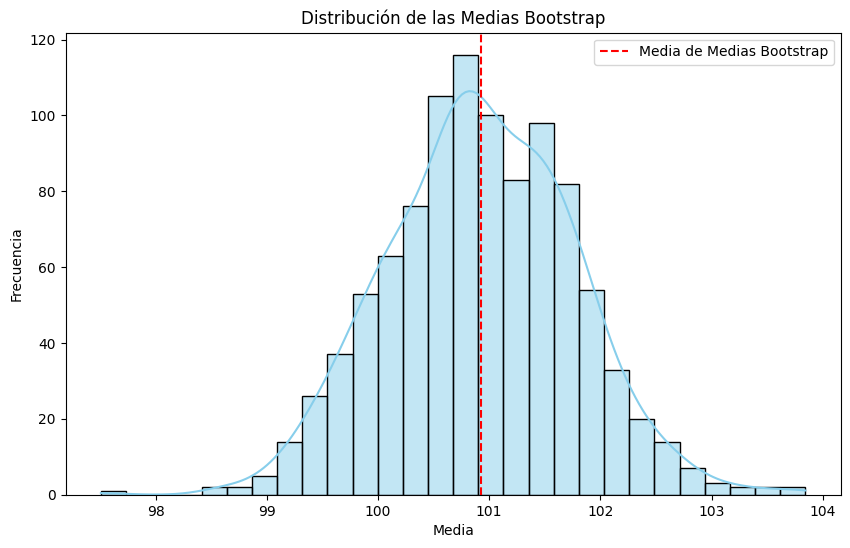

0.8376273952231909

In [3]:
# Generando datos simulados
np.random.seed(9)
datos_simulados = np.random.normal(100, 20, 500)  # media=100, sd=20, n=500

# Número de muestras bootstrap
B = 1000
estimadores_bootstrap = []

for _ in range(B):
    muestra_bootstrap = np.random.choice(datos_simulados, size=len(datos_simulados), replace=True)
    media_muestra_bootstrap = np.mean(muestra_bootstrap)
    estimadores_bootstrap.append(media_muestra_bootstrap)

# Calculando el error estándar bootstrap de la media
media_estimadores = np.mean(estimadores_bootstrap)
error_estandar_bootstrap = np.sqrt(np.sum((estimadores_bootstrap - media_estimadores)**2) / (B-1))

# Creando un DataFrame con los resultados de las muestras bootstrap para visualización
df_bootstrap = pd.DataFrame({'Medias Bootstrap': estimadores_bootstrap})

import matplotlib.pyplot as plt
import seaborn as sns

# Repitiendo la generación del gráfico después de definir las librerías necesarias
plt.figure(figsize=(10, 6))
sns.histplot(df_bootstrap['Medias Bootstrap'], kde=True, color='skyblue')
plt.title('Distribución de las Medias Bootstrap')
plt.xlabel('Media')
plt.ylabel('Frecuencia')
plt.axvline(x=media_estimadores, color='red', linestyle='--', label='Media de Medias Bootstrap')
plt.legend()
plt.show()

error_estandar_bootstrap

La distribución de las medias calculadas a partir de 1000 muestras bootstrap muestra cómo varían estas medias alrededor de la media de todas las medias bootstrap, marcada por la línea roja discontinua. Este es un ejemplo visual del principio bootstrap en acción, proporcionando una forma empírica de entender la distribución del estimador (en este caso, la media).

El error estándar de la media, estimado utilizando el método bootstrap, es aproximadamente $(0.84)$. Este valor representa la variabilidad o incertidumbre de nuestra estimación de la media poblacional basada en la muestra original, y se calcula a partir de la dispersión de las medias de las muestras bootstrap alrededor de su media.

Este enfoque bootstrap es especialmente útil cuando la distribución subyacente de los datos es desconocida o cuando las fórmulas estándar para el cálculo del error estándar no son aplicables o fáciles de implementar. Proporciona una técnica poderosa y flexible para la estimación de errores estándar y otros parámetros estadísticos.

## **5.4 Más información sobre los intervalos de confianza**

Los **intervalos de confianza (IC)** proporcionan un rango estimado que es muy probable que contenga el valor real de un parámetro desconocido de la población, como la media o la proporción. El intervalo tiene un nivel de confianza asociado que cuantifica la seguridad de que el parámetro poblacional se encuentra dentro del intervalo. Por ejemplo, un IC del 95% significa que si repetimos el experimento muchas veces, aproximadamente el 95% de los intervalos calculados contendrían el verdadero valor del parámetro.

**Fórmulas para Intervalos de Confianza**

- **Para la media poblacional $(\mu)$ con varianza poblacional conocida**, usamos la distribución normal $(Z)$:

$IC = \bar{x} \pm Z_{\frac{\alpha}{2}} \left( \frac{\sigma}{\sqrt{n}} \right)$

- **Para la media poblacional $(\mu)$ con varianza poblacional desconocida**, y $(n < 30)$, usamos la distribución $(t)$ de Student:

$IC = \bar{x} \pm t_{\frac{\alpha}{2}, n-1} \left( \frac{s}{\sqrt{n}} \right)$

- **Para la proporción poblacional $(p)$**, el IC se basa en la aproximación normal:

$IC = \hat{p} \pm Z_{\frac{\alpha}{2}} \sqrt{ \frac{\hat{p}(1-\hat{p})}{n} }$

Donde:

- $(\bar{x})$ y $(\hat{p})$ son la media y la proporción de la muestra, respectivamente

- $(\sigma)$ y $(s)$ son la desviación estándar poblacional y de la muestra, respectivamente

- $(n)$ es el tamaño de la muestra

- $(Z_{\frac{\alpha}{2}})$ y $(t_{\frac{\alpha}{2}, n-1})$ son los valores críticos de las distribuciones normal y $(t)$ para un nivel de confianza dado

- $(n-1)$ denota los grados de libertad para la distribución $(t)$.

**Ejemplo con Datos Simulados**

Generaremos un conjunto de datos para calcular el intervalo de confianza del 95% para la media poblacional, utilizando la distribución $(t)$ de Student, suponiendo que la varianza de la población es desconocida y el tamaño de la muestra es menor a 30.

In [4]:
# Generando datos simulados para el ejemplo
np.random.seed(10)
datos = np.random.normal(120, 25, 25)  # media=120, sd=25, n=25

# Creando DataFrame
df_IC = pd.DataFrame({'Datos': datos})

# Calculando la media y la desviación estándar de la muestra
media_muestra = df_IC['Datos'].mean()
sd_muestra = df_IC['Datos'].std(ddof=1)
n = len(df_IC)

# Nivel de confianza del 95%, utilizando la distribución t
alpha = 0.05
t_critico = t.ppf(1 - alpha/2, n-1)

# Calculando el intervalo de confianza
margen_error = t_critico * (sd_muestra / np.sqrt(n))
IC_inferior = media_muestra - margen_error
IC_superior = media_muestra + margen_error

# Resultados
(IC_inferior, IC_superior)

(111.2855103089305, 133.5705251907251)

El intervalo de confianza del 95% para la media poblacional, calculado utilizando la distribución $(t)$ de Student dado que la varianza de la población es desconocida y el tamaño de la muestra es menor a 30, es aproximadamente de $(111.29)$ a $(133.57)$. Esto significa que, basándonos en nuestra muestra, podemos estar un 95% confiados de que la verdadera media de la población se encuentra dentro de este rango.

Este ejemplo destaca cómo los intervalos de confianza permiten cuantificar la incertidumbre asociada con las estimaciones de parámetros poblacionales, proporcionando un rango dentro del cual se espera que se encuentre el verdadero valor del parámetro con un cierto nivel de confianza. La utilización de la distribución $(t)$ es crucial cuando trabajamos con tamaños de muestra pequeños y la varianza poblacional es desconocida, asegurando que el intervalo de confianza tenga en cuenta la mayor incertidumbre en la estimación.

## **5.5 La idea que subyace a la comprobación de hipótesis**

La comprobación de hipótesis es un procedimiento fundamental en estadística para decidir si una suposición (hipótesis) sobre una característica poblacional es verdadera, basándose en los datos de una muestra. Este proceso implica dos hipótesis: la **hipótesis nula $(H_0)$**, que representa una afirmación de "no efecto" o "no diferencia", y la **hipótesis alternativa $(H_1)$ o $(H_a)$**, que representa lo que estamos tratando de probar, como una diferencia o efecto.

**Pasos en la Comprobación de Hipótesis**

1. **Formular las Hipótesis:** Definir $(H_0)$ y $(H_a)$.
2. **Establecer el Nivel de Significancia $(\alpha)$:** Este es el riesgo de rechazar $(H_0)$ cuando es verdadera, comúnmente fijado en 0.05.
3. **Calcular el Estadístico de Prueba:** Dependiendo del tipo de datos y la prueba, este puede ser un valor $(t)$, $(Z)$, $(\chi^2)$, etc.
4. **Determinar el Valor Crítico o el p-valor:** Comparar el estadístico de prueba con un valor crítico (basado en $(\alpha)$ o utilizar el p-valor para tomar la decisión.
5. **Tomar la Decisión:** Si el estadístico de prueba es más extremo que el valor crítico o si el p-valor es menor que $(\alpha)$, rechazamos $(H_0)$.

**Fórmulas Comunes para el Estadístico de Prueba**

- **Para una media $(t)$-test para una muestra):**

$t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$

  donde $(\bar{x})$ es la media de la muestra, $(\mu_0)$ es la media poblacional bajo $(H_0)$, $(s)$ es la desviación estándar de la muestra, y $(n)$ es el tamaño de la muestra.

- **Para una proporción (prueba $(Z)$ para una proporción):**

$Z = \frac{\hat{p} - p_0}{\sqrt{p_0(1 - p_0) / n}}$

  donde $(\hat{p})$ es la proporción de muestra, y $(p_0)$ es la proporción poblacional bajo $(H_0)$.

**Ejemplo con Datos Simulados**

Supongamos que queremos probar si el tiempo medio de respuesta en un sitio web es diferente de 2 segundos. Utilizaremos un $(t)$-test para una muestra para esta hipótesis.

- $(H_0: \mu = 2)$
- $(H_a: \mu \neq 2)$

Generaremos datos simulados para representar los tiempos de respuesta del sitio web y realizaremos la prueba de hipótesis.

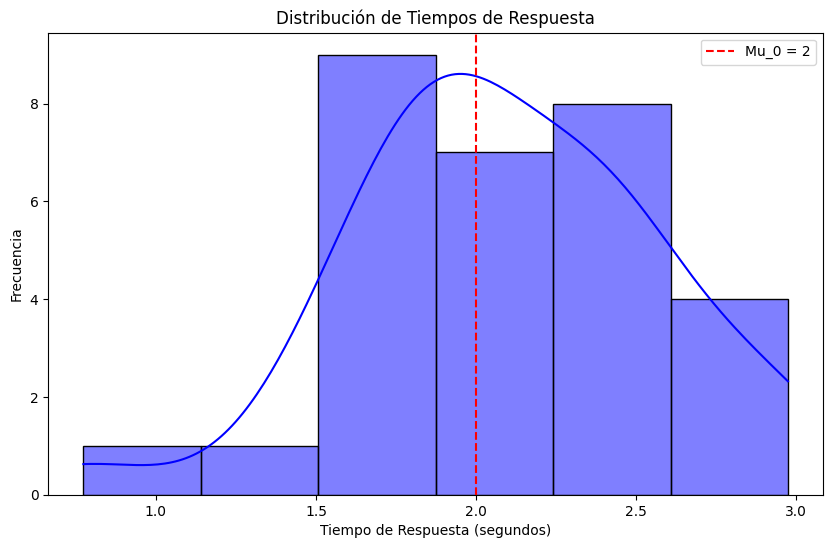

(1.0133766220342788, 0.3192610578828762)

In [5]:
from scipy.stats import ttest_1samp

# Generando datos simulados: tiempos de respuesta del sitio web en segundos
np.random.seed(11)
tiempos_respuesta = np.random.normal(2.1, 0.5, 30)  # media=2.1, sd=0.5, n=30

# Creando DataFrame
df_tiempos = pd.DataFrame({'Tiempos de Respuesta': tiempos_respuesta})

# Hipótesis: H0: mu = 2, Ha: mu != 2
mu_0 = 2

# Realizando la prueba t para una muestra
t_stat, p_valor = ttest_1samp(df_tiempos['Tiempos de Respuesta'], popmean=mu_0)

# Gráfico de los tiempos de respuesta
plt.figure(figsize=(10, 6))
sns.histplot(df_tiempos['Tiempos de Respuesta'], kde=True, color='blue')
plt.axvline(x=mu_0, color='red', linestyle='--', label='Mu_0 = 2')
plt.title('Distribución de Tiempos de Respuesta')
plt.xlabel('Tiempo de Respuesta (segundos)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

(t_stat, p_valor)

La prueba $(t)$ para una muestra produce un estadístico de prueba de aproximadamente $(1.01)$ y un p-valor de $(0.319)$. Dado un nivel de significancia típico de $(\alpha = 0.05)$, el p-valor es mayor que $(\alpha)$, lo que indica que no tenemos suficiente evidencia para rechazar la hipótesis nula $(H_0)$. En otras palabras, no hay suficiente evidencia estadística para afirmar que el tiempo medio de respuesta del sitio web es diferente de 2 segundos.

El gráfico muestra la distribución de los tiempos de respuesta del sitio web junto con la línea roja discontinua que representa el tiempo de respuesta promedio bajo la hipótesis nula $(\mu = 2)$ segundos. La distribución de los datos sugiere una ligera desviación de la hipótesis nula, pero según el resultado de la prueba $(t)$, esta desviación no es estadísticamente significativa.

Este ejemplo ilustra el proceso de realizar una prueba de hipótesis para evaluar afirmaciones sobre parámetros poblacionales (en este caso, la media) basándose en datos de muestra. La interpretación del p-valor y la comparación con el nivel de significancia nos permite tomar decisiones estadísticas sobre la validez de la hipótesis nula.

## **5.6 Configuración de una estadística de prueba**

La **configuración de una estadística de prueba** en el contexto de la comprobación de hipótesis es el proceso de seleccionar y calcular una medida numérica que se utiliza para evaluar una hipótesis sobre un parámetro poblacional. La estadística de prueba se deriva de la muestra de datos y se compara con una distribución teórica bajo la suposición de que la hipótesis nula $(H_0)$ es verdadera. El resultado de esta comparación ayuda a decidir si rechazar o no rechazar $(H_0)$.

**Tipos Comunes de Estadísticas de Prueba**

- **Prueba Z para medias:** Se usa cuando se conoce la desviación estándar de la población y el tamaño de la muestra es grande $(n > 30)$.

  $Z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}$

  Donde $(\bar{x})$ es la media de la muestra, $(\mu_0)$ es la media bajo $(H_0)$, $(\sigma)$ es la desviación estándar de la población, y $(n)$ es el tamaño de la muestra.

- **Prueba t para medias:** Se utiliza cuando la desviación estándar de la población es desconocida y el tamaño de la muestra es pequeño $(n \leq 30)$.

  $t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$

Donde $(s)$ es la desviación estándar de la muestra.

- **Prueba $(\chi^2)$ para varianzas:** Evalúa la varianza de una población.

  $\chi^2 = \frac{(n-1)s^2}{\sigma^2_0}$

  Donde $(\sigma^2_0)$ es la varianza bajo $(H_0)$.

- **Prueba Z para proporciones:** Cuando se quiere comparar una proporción muestral con una proporción poblacional conocida.

  $Z = \frac{\hat{p} - p_0}{\sqrt{p_0(1 - p_0) / n}}$

  Donde $(\hat{p})$ es la proporción de la muestra y $(p_0)$ es la proporción bajo $(H_0)$.

**Ejemplo: Prueba t para Medias**

Para ilustrar cómo configurar y usar una estadística de prueba, consideremos un ejemplo en el que queremos probar si la media de la presión arterial sistólica en una población es diferente de 120 mmHg, basándonos en una muestra de datos. Utilizaremos la prueba $(t)$ para una muestra.

Crearemos un DataFrame con datos simulados para representar las mediciones de presión arterial y realizaremos la prueba $(t)$.

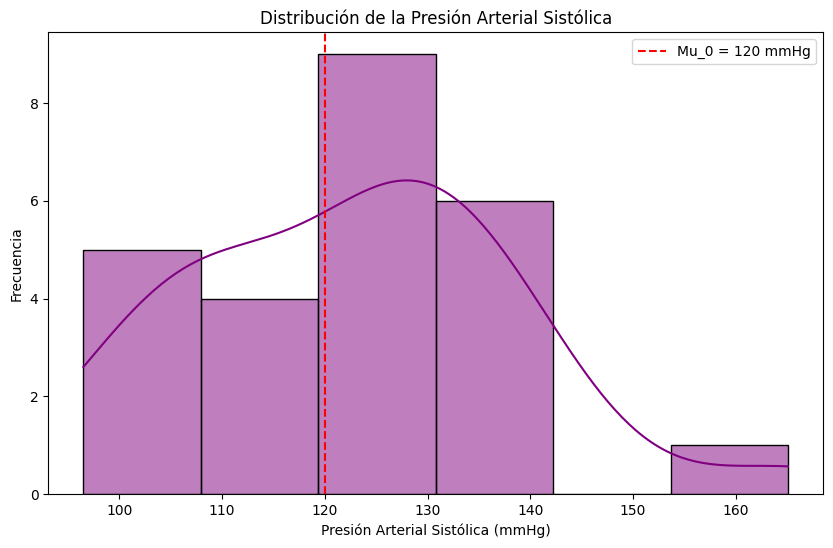

(0.8920670852237855, 0.38121415402268966)

In [6]:
# Generando datos simulados: presión arterial sistólica
np.random.seed(12)
presion_arterial = np.random.normal(122, 15, 25)  # media=122, sd=15, n=25

# Creando DataFrame
df_presion = pd.DataFrame({'Presion Arterial': presion_arterial})

# Hipótesis: H0: mu = 120, Ha: mu != 120
mu_0 = 120

# Realizando la prueba t para una muestra
t_stat, p_valor = ttest_1samp(df_presion['Presion Arterial'], popmean=mu_0)

# Gráfico de las mediciones de presión arterial
plt.figure(figsize=(10, 6))
sns.histplot(df_presion['Presion Arterial'], kde=True, color='purple')
plt.axvline(x=mu_0, color='red', linestyle='--', label='Mu_0 = 120 mmHg')
plt.title('Distribución de la Presión Arterial Sistólica')
plt.xlabel('Presión Arterial Sistólica (mmHg)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

(t_stat, p_valor)

La prueba $(t)$ para una muestra produce un estadístico de prueba de aproximadamente $(0.89)$ y un p-valor de $(0.381)$. Con un nivel de significancia típico de $(\alpha = 0.05)$, el p-valor es mayor que $(\alpha)$, lo que indica que no tenemos suficiente evidencia para rechazar la hipótesis nula $(H_0)$. En términos prácticos, esto significa que no hay suficiente evidencia estadística para afirmar que la media de la presión arterial sistólica en la población es diferente de 120 mmHg, basándonos en nuestra muestra.

El gráfico muestra la distribución de las mediciones de presión arterial sistólica junto con la línea roja discontinua que representa la media de presión arterial sistólica bajo la hipótesis nula $(120)$ mmHg. La distribución sugiere una leve tendencia hacia valores superiores a $(120)$ mmHg, pero el resultado de la prueba $(t)$ indica que esta diferencia no es estadísticamente significativa.

Este ejemplo ilustra el proceso de configurar y utilizar una estadística de prueba $(t)$ en este caso para evaluar hipótesis sobre parámetros poblacionales (la media en este ejemplo) basándose en datos de muestra. La selección adecuada de la estadística de prueba, basada en el tipo de datos y el objetivo del análisis, es crucial para realizar inferencias estadísticas válidas.

## **5.7 los valores p como medidas de evidencia**

Los **valores p** son una medida fundamental en estadística para cuantificar la evidencia en contra de la hipótesis nula $(H_0)$ en el contexto de una prueba de hipótesis. Un valor p indica la probabilidad de observar resultados tan extremos como los encontrados en los datos de la muestra, o más extremos, asumiendo que la hipótesis nula es verdadera.

**Interpretación del Valor p**

- Un **valor p bajo** sugiere que los datos observados son inusuales bajo la suposición de que $(H_0)$ es cierta. Por lo tanto, un valor p bajo proporciona evidencia para rechazar $(H_0)$.
- Un **valor p alto** indica que los datos observados no son inusuales bajo $(H_0)$, y no proporciona suficiente evidencia para rechazar $(H_0)$.

El **nivel de significancia $(\alpha)$** es un umbral preestablecido por el investigador (comúnmente $(0.05)$), contra el cual se compara el valor p para tomar una decisión sobre $(H_0)$:

- Si **valor p $( \leq \alpha)$**, rechazamos $(H_0)$.
- Si **valor p $( > \alpha)$**, no rechazamos $(H_0)$.

**Fórmula del Valor p**

El valor p se calcula a partir del estadístico de prueba $(t)$, $(Z)$, etc. obtenido de los datos. La fórmula específica depende del tipo de prueba realizada. Por ejemplo, para una prueba $(t)$ para una muestra, el valor p se obtiene a partir de la distribución $(t)$ de Student:

$\text{valor p} = P(T \geq |t_{\text{observado}}|)$

para una prueba de dos colas, donde $(T)$ es una variable aleatoria que sigue la distribución $(t)$ de Student con $(n-1)$ grados de libertad.

**Ejemplo: Calculando el Valor p para una Prueba t**

Supongamos que queremos probar si la media de una muestra es significativamente diferente de un valor conocido, usando una prueba $(t)$ de una muestra. Crearemos un conjunto de datos simulados para este propósito, realizaremos la prueba y calcularemos el valor p.

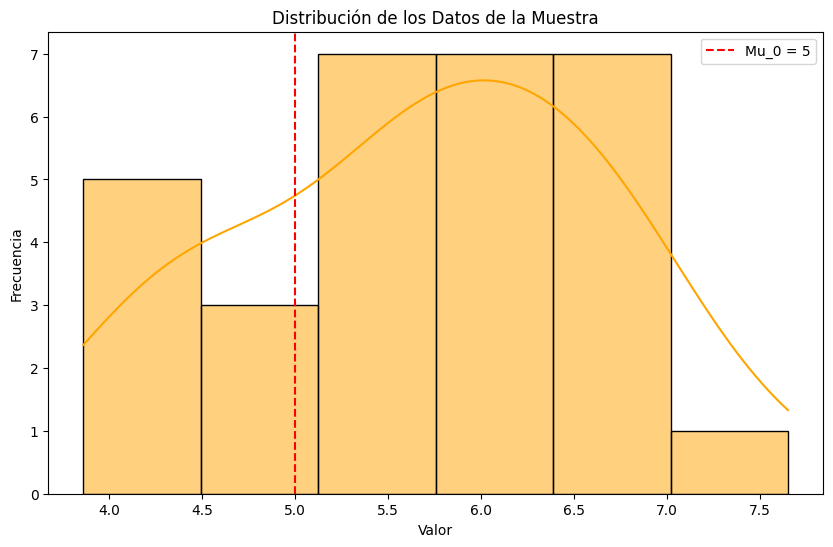

(3.7378765611310283, 0.0008110938143721545)

In [7]:
# Generando datos simulados: una muestra
np.random.seed(13)
datos_muestra = np.random.normal(5.5, 1.0, 30)  # media=5.5, sd=1.0, n=30

# Creando DataFrame
df_muestra = pd.DataFrame({'Datos': datos_muestra})

# Hipótesis: H0: mu = 5, H1: mu != 5 (prueba de dos colas)
mu_0 = 5

# Realizando la prueba t para una muestra
t_stat, p_valor = ttest_1samp(df_muestra['Datos'], popmean=mu_0)

# Gráfico de los datos de la muestra
plt.figure(figsize=(10, 6))
sns.histplot(df_muestra['Datos'], kde=True, color='orange')
plt.axvline(x=mu_0, color='red', linestyle='--', label='Mu_0 = 5')
plt.title('Distribución de los Datos de la Muestra')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

(t_stat, p_valor)

La prueba $(t)$ para una muestra produce un estadístico de prueba de aproximadamente $(3.74)$ y un valor p de aproximadamente $(0.0008)$. Con un nivel de significancia típico de $(\alpha = 0.05)$, el valor p es menor que $(\alpha)$, lo que indica que tenemos suficiente evidencia para rechazar la hipótesis nula $(H_0: \mu = 5)$. En términos prácticos, esto significa que hay evidencia estadística significativa para afirmar que la media de la población de donde se extrajo la muestra es diferente de 5.

El gráfico muestra la distribución de los datos de la muestra con una línea roja discontinua que representa la media poblacional bajo la hipótesis nula $(5)$. La distribución sugiere que los datos de la muestra tienden a estar centrados alrededor de un valor ligeramente superior a 5, lo cual es consistente con el rechazo de $(H_0)$ basado en el valor p obtenido.

Este ejemplo ilustra cómo el valor p proporciona una medida cuantitativa de la evidencia en contra de la hipótesis nula, permitiendo tomar decisiones informadas sobre la validez de las suposiciones estadísticas basadas en los datos de la muestra.

## **5.8 La prueba t**

La **prueba t** es un procedimiento estadístico utilizado para determinar si existe una diferencia significativa entre las medias de dos grupos (prueba t para muestras independientes) o para comparar la media de una muestra con un valor conocido (prueba t para una muestra) o para comparar las medias de dos condiciones relacionadas para el mismo grupo (prueba t para muestras emparejadas). Las pruebas t son aplicables cuando los datos se aproximan a una distribución normal, y se basan en la distribución t de Student.

**Prueba t para una Muestra**

Se utiliza para comparar la media de una muestra $(\bar{x})$ con una media poblacional conocida $(\mu_0)$.

**Fórmula:**

$t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$

Donde:

- $(\bar{x})$ es la media de la muestra,
- $(\mu_0)$ es la media poblacional bajo la hipótesis nula,
- $(s)$ es la desviación estándar de la muestra,
- $(n)$ es el tamaño de la muestra.

**Prueba t para Muestras Independientes**

Compara las medias de dos grupos independientes para determinar si existen diferencias estadísticamente significativas entre ellas.

**Fórmula:**

$t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{s^2_p \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}$

Donde:

- $(\bar{x}_1)$ y $(\bar{x}_2)$ son las medias de las dos muestras,
- $(s^2_p)$ es la varianza agrupada de las dos muestras,
- $(n_1)$ y $(n_2)$ son los tamaños de las muestras.

**Prueba t para Muestras Emparejadas**

Utilizada para comparar las medias de dos condiciones relacionadas o emparejadas, como mediciones antes y después de un tratamiento en los mismos sujetos.

**Fórmula:**

$t = \frac{\bar{d}}{s_d / \sqrt{n}}$

Donde:

- $(\bar{d})$ es la media de las diferencias entre las parejas de observaciones,
- $(s_d)$ es la desviación estándar de estas diferencias,
- $(n)$ es el número de parejas.

**Ejemplo: Prueba t para una Muestra**

Generaremos un conjunto de datos simulado para comparar la media de una muestra con un valor conocido, utilizando una prueba t para una muestra.

Supongamos que queremos probar si la media de una muestra de estudiantes en un examen es diferente de 75. Crearemos un DataFrame con datos simulados para representar las puntuaciones de los exámenes y realizaremos la prueba.

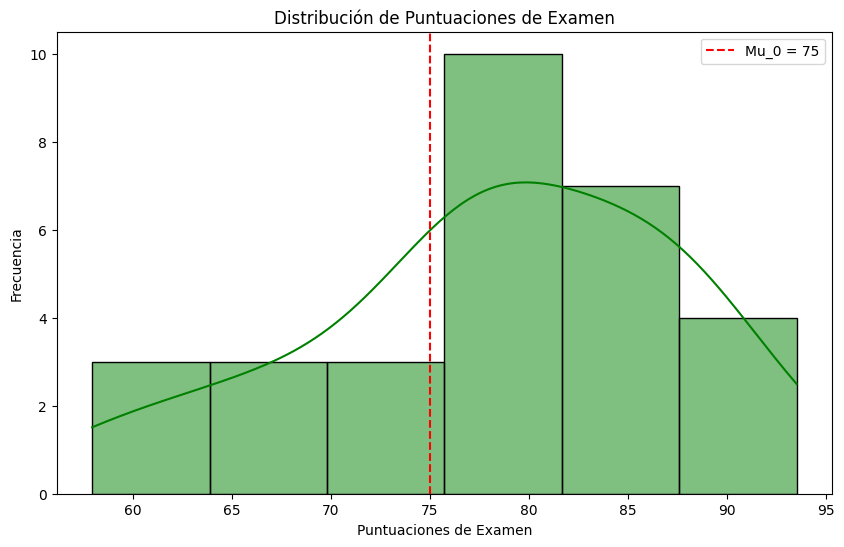

(1.9038043424811122, 0.06690167402823377)

In [8]:
from scipy.stats import ttest_1samp

# Generando datos simulados: puntuaciones de exámenes
np.random.seed(14)
puntuaciones_examen = np.random.normal(78, 10, 30)  # media=78, sd=10, n=30

# Creando DataFrame
df_examen = pd.DataFrame({'Puntuaciones': puntuaciones_examen})

# Hipótesis: H0: mu = 75, H1: mu != 75
mu_0 = 75

# Realizando la prueba t para una muestra
t_stat, p_valor = ttest_1samp(df_examen['Puntuaciones'], popmean=mu_0)

# Gráfico de las puntuaciones de exámenes
plt.figure(figsize=(10, 6))
sns.histplot(df_examen['Puntuaciones'], kde=True, color='green')
plt.axvline(x=mu_0, color='red', linestyle='--', label='Mu_0 = 75')
plt.title('Distribución de Puntuaciones de Examen')
plt.xlabel('Puntuaciones de Examen')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

(t_stat, p_valor)

La prueba $(t)$ para una muestra produce un estadístico de prueba de aproximadamente $(1.90)$ y un valor p de aproximadamente $(0.067)$. Con un nivel de significancia típico de $(\alpha = 0.05)$, el valor p es ligeramente mayor que $(\alpha)$, lo que indica que no tenemos suficiente evidencia para rechazar la hipótesis nula $(H_0: \mu = 75)$. En términos prácticos, esto significa que, basándonos en nuestra muestra, no hay suficiente evidencia estadística para afirmar que la media de las puntuaciones de examen es diferente de 75.

El gráfico muestra la distribución de las puntuaciones de examen con una línea roja discontinua que representa la media poblacional bajo la hipótesis nula $(75)$. La distribución sugiere que las puntuaciones tienden a ser ligeramente superiores a 75, pero el resultado de la prueba $(t)$ indica que esta diferencia no es estadísticamente significativa.

Este ejemplo ilustra cómo se configura y se aplica una prueba $(t)$ para una muestra para evaluar hipótesis sobre la media poblacional, basándose en datos de muestra. La selección del test adecuado, el cálculo del estadístico de prueba y la interpretación del valor p son pasos clave en el proceso de comprobación de hipótesis.

## **5.9 Significación estadística frente a importancia**

La **significación estadística** y la **importancia práctica** son conceptos fundamentales en el análisis de datos que, aunque relacionados, tienen significados distintos. Entender la diferencia entre ellos es crucial para interpretar correctamente los resultados de un análisis estadístico.

**Significación Estadística**

La significación estadística se refiere a la probabilidad de que la relación observada en los datos de la muestra no se deba al azar. Se evalúa mediante el **valor p** y el **nivel de significancia $(\alpha)$** preestablecido (comúnmente $(0.05)$).

- Un **valor p** menor que $(\alpha)$ sugiere que los resultados son estadísticamente significativos, es decir, la evidencia contra la hipótesis nula $(H_0)$ es fuerte suficiente para rechazarla.

**Importancia Práctica**

La importancia práctica considera si la magnitud de la diferencia o relación encontrada es suficientemente grande para ser de valor en el mundo real. Incluso un resultado estadísticamente significativo puede tener una diferencia tan pequeña que no es relevante en la práctica.

La importancia práctica depende del contexto del estudio y no se puede determinar únicamente por el análisis estadístico. A menudo, se evalúa mediante el **tamaño del efecto**, que cuantifica la magnitud de la diferencia o relación observada.

**Ejemplo: Significación Estadística vs. Importancia Práctica**

Supongamos que investigamos la diferencia en la puntuación de satisfacción del cliente entre dos productos. Generaremos datos simulados para dos productos, realizaremos una prueba $(t)$ para muestras independientes para evaluar la significancia estadística, y calcularemos el tamaño del efecto para juzgar la importancia práctica.

- **Fórmula del tamaño del efecto (d de Cohen) para la prueba t:**

$d = \frac{\bar{x}_1 - \bar{x}_2}{s_{pooled}}$

donde $(\bar{x}_1)$ y $(\bar{x}_2)$ son las medias de las dos muestras, y $(s_{pooled})$ es la desviación estándar agrupada.

In [9]:
from scipy.stats import ttest_ind

# Re-definiendo los datos y realizando los cálculos nuevamente
np.random.seed(15)
producto_A = np.random.normal(80, 10, 100)  # Puntuación media=80, sd=10, n=100
producto_B = np.random.normal(81, 10, 100)  # Puntuación media=81, sd=10, n=100

# Realizando la prueba t para muestras independientes
t_stat, p_valor = ttest_ind(producto_A, producto_B)

# Cálculo manual del tamaño del efecto (Cohen's d)
media_A = np.mean(producto_A)
media_B = np.mean(producto_B)
sd_pooled = np.sqrt((np.var(producto_A, ddof=1) + np.var(producto_B, ddof=1)) / 2)
d = (media_A - media_B) / sd_pooled

(t_stat, p_valor, d)

(-0.626292639599098, 0.5318443645338939, -0.08857115449354894)

La prueba $(t)$ para muestras independientes produce un estadístico de prueba de aproximadamente $(-0.63)$ y un valor $(p)$ de aproximadamente $(0.53)$. Esto indica que, con un nivel de significancia típico de $(\alpha = 0.05)$, no hay suficiente evidencia para rechazar la hipótesis nula; es decir, no hay una diferencia estadísticamente significativa en las puntuaciones medias de satisfacción entre los dos productos.

El tamaño del efecto de Cohen's $(d)$ es aproximadamente $(-0.09)$, lo que sugiere que la diferencia entre los dos grupos, aunque no es estadísticamente significativa, también es pequeña en términos prácticos. Un $(d)$ cercano a 0 indica una diferencia de magnitud pequeña entre los grupos. En este contexto, la diferencia observada entre las puntuaciones de satisfacción de los productos A y B puede no ser prácticamente relevante.

Este ejemplo ilustra la distinción entre significancia estadística y relevancia práctica. Aunque la prueba $(t)$ no encontró evidencia para rechazar la hipótesis nula (significando que cualquier diferencia detectada entre las medias de los dos productos podría ser debido al azar), el tamaño del efecto de Cohen's $(d)$ ofrece una perspectiva adicional sobre la magnitud de esa diferencia, subrayando su potencial irrelevancia práctica.

## **5.10 La prueba z de dos muestras**

La **prueba $(z)$ de dos muestras** es un método estadístico utilizado para determinar si hay una diferencia significativa entre las medias de dos poblaciones, basándose en dos muestras independientes de estas poblaciones. Esta prueba es adecuada cuando los tamaños de muestra son grandes $(n \geq 30)$, y las varianzas de las poblaciones son conocidas y asumidas iguales, aunque en la práctica a menudo se usa la estimación de la varianza de las muestras cuando las poblaciones son grandes.

**Fórmulas para la Prueba $(z)$ de Dos Muestras**

La estadística de prueba se calcula como:

$z = \frac{(\bar{x}_1 - \bar{x}_2) - (\mu_1 - \mu_2)}{\sqrt{\sigma^2_1/n_1 + \sigma^2_2/n_2}}$

Donde:

- $(\bar{x}_1)$ y $(\bar{x}_2)$ son las medias muestrales de las dos poblaciones,
- $(\mu_1)$ y $(\mu_2)$ son las medias poblacionales (cuando se prueba una hipótesis específica sobre las diferencias en las medias),
- $(\sigma^2_1)$ y $(\sigma^2_2)$ son las varianzas conocidas de las poblaciones,
- $(n_1)$ y $(n_2)$ son los tamaños de las muestras de las dos poblaciones.

Para la mayoría de los tests, $(\mu_1 - \mu_2 = 0)$, lo que simplifica la fórmula a:

$z = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\sigma^2_1/n_1 + \sigma^2_2/n_2}}$

El valor $(z)$ obtenido se compara con valores críticos de la distribución normal estándar para determinar si la diferencia observada es estadísticamente significativa.

**Ejemplo con Datos Simulados**

Supongamos que queremos comparar las medias de dos grupos para ver si hay una diferencia significativa entre ellos. Para este ejemplo, generaremos dos conjuntos de datos simulados que representan las puntuaciones de dos grupos diferentes. Asumiremos que conocemos las varianzas de las poblaciones de las que provienen estas muestras.

Crearemos un DataFrame para estos datos y realizaremos la prueba $(z)$ de dos muestras.

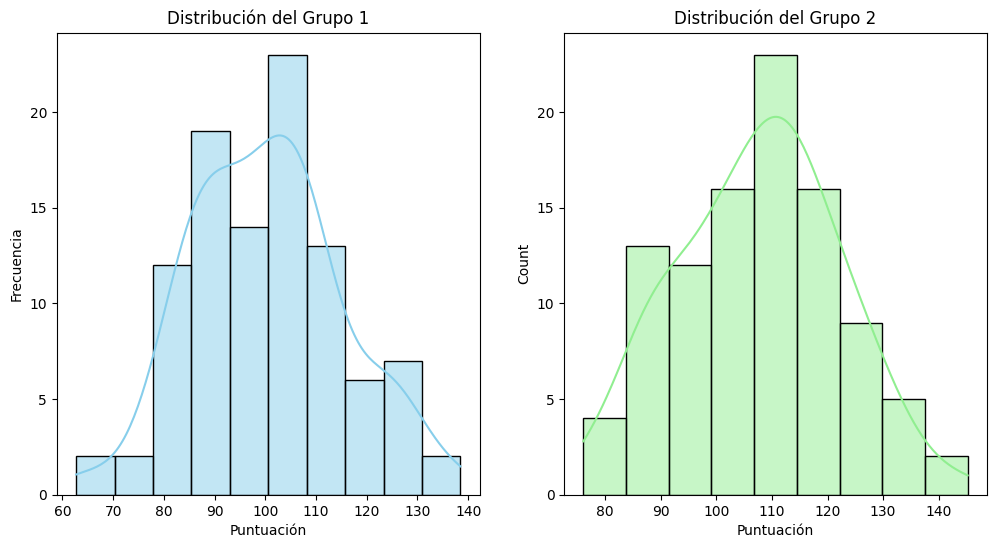

(-3.5228537884784172, 0.00042692681334414073)

In [10]:
from statsmodels.stats.weightstats import ztest

# Generando datos simulados para dos grupos
np.random.seed(16)
grupo_1 = np.random.normal(100, 15, 100)  # media=100, sd=15, n=100 para el grupo 1
grupo_2 = np.random.normal(105, 15, 100)  # media=105, sd=15, n=100 para el grupo 2

# Realizando la prueba z de dos muestras
z_stat, p_valor = ztest(grupo_1, grupo_2)

# Gráficos de los datos
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(grupo_1, color="skyblue", kde=True)
plt.title('Distribución del Grupo 1')
plt.xlabel('Puntuación')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(grupo_2, color="lightgreen", kde=True)
plt.title('Distribución del Grupo 2')
plt.xlabel('Puntuación')
plt.show()

(z_stat, p_valor)

La prueba $(z)$ de dos muestras produce un estadístico de prueba de aproximadamente $(-3.52)$ y un valor $(p)$ de aproximadamente $(0.00043)$. Esto indica que, con un nivel de significancia típico de $(\alpha = 0.05)$, hay suficiente evidencia para rechazar la hipótesis nula; es decir, hay una diferencia estadísticamente significativa en las medias de puntuación entre los dos grupos.

Los gráficos de los datos muestran las distribuciones de las puntuaciones para ambos grupos. Aunque visualmente las distribuciones parecen tener cierta superposición, la prueba $(z)$ ha identificado una diferencia significativa entre las medias de los grupos, lo que sugiere que la diferencia observada no es debido al azar.

Este resultado subraya la importancia de realizar pruebas estadísticas para corroborar observaciones visuales. A pesar de que dos distribuciones puedan parecer similares, pueden existir diferencias significativas en sus parámetros subyacentes, como las medias, que solo se pueden detectar mediante el análisis estadístico adecuado.

## **5.11 Pares emparejados**

Los **pares emparejados** se refieren a una técnica de diseño experimental donde cada sujeto o entidad es emparejada con sí misma o con otra sujeto o entidad que es similar en términos de una o más características. Esta técnica se utiliza a menudo en estudios donde el objetivo es controlar las variables de confusión y aislar el efecto de un tratamiento o condición específica. En estadística, las pruebas de pares emparejados se utilizan para comparar dos mediciones o condiciones para el mismo sujeto o entidades emparejadas.

**Prueba t para Pares Emparejados**

Una **prueba t para pares emparejados** (también conocida como prueba t dependiente) compara las medias de dos condiciones o mediciones relacionadas para determinar si existe una diferencia significativa entre ellas. Se utiliza cuando las dos muestras están relacionadas de alguna manera (p. ej., mediciones antes y después de un tratamiento en los mismos sujetos).

**Fórmula de la prueba t para pares emparejados:**

$t = \frac{\bar{d}}{s_d / \sqrt{n}}$

Donde:

- $(\bar{d})$ es la media de las diferencias entre las parejas de observaciones (p. ej., antes-después),
- $(s_d)$ es la desviación estándar de estas diferencias,
- $(n)$ es el número de pares.

**Ejemplo: Prueba t para Pares Emparejados**

Supongamos que queremos evaluar el efecto de un programa de entrenamiento en la capacidad cardiovascular de un grupo de sujetos, midiendo su capacidad cardiovascular antes y después del programa. Para este propósito, generaremos un conjunto de datos simulados representando las mediciones de capacidad cardiovascular antes y después del entrenamiento para un grupo de sujetos.

Crearemos un DataFrame con estos datos y realizaremos una prueba t para pares emparejados.

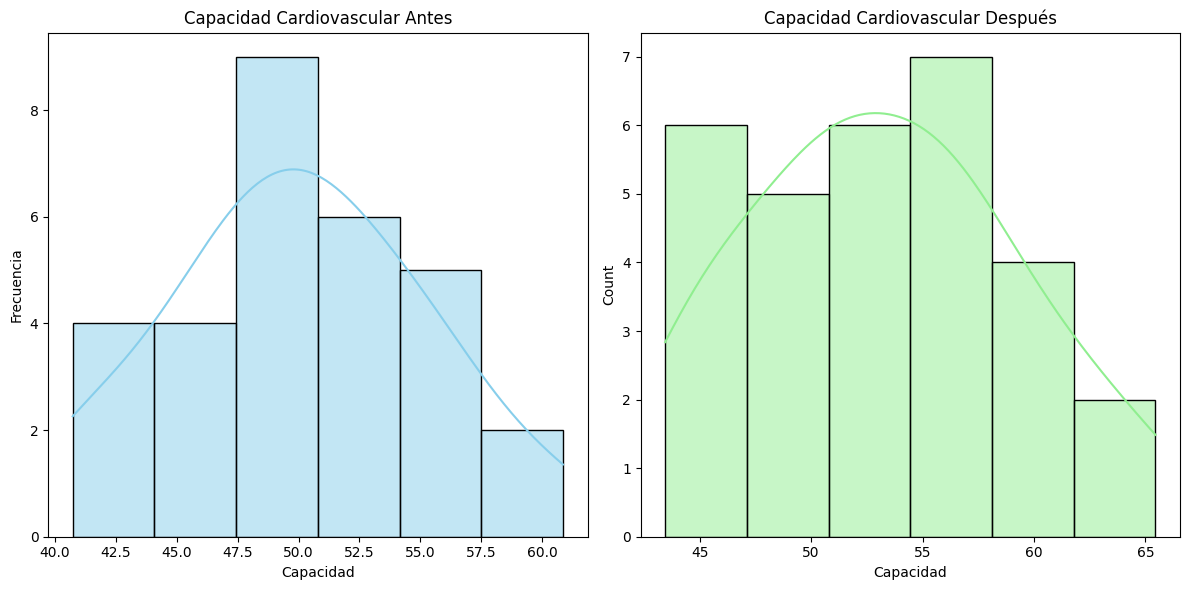

(-8.526787122587347, 2.1512736353940216e-09)

In [11]:
from scipy.stats import ttest_rel

# Generando datos simulados: capacidad cardiovascular antes y después del entrenamiento
np.random.seed(17)
capacidad_antes = np.random.normal(50, 5, 30)  # Capacidad promedio=50, sd=5, n=30
capacidad_despues = capacidad_antes + np.random.normal(3, 2, 30)  # Mejora promedio=3, sd=2

# Creando DataFrame
df_capacidad = pd.DataFrame({'Antes': capacidad_antes, 'Después': capacidad_despues})

# Realizando la prueba t para pares emparejados
t_stat, p_valor = ttest_rel(df_capacidad['Antes'], df_capacidad['Después'])

# Gráfico de las mediciones de capacidad cardiovascular antes y después del entrenamiento
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_capacidad['Antes'], color="skyblue", kde=True)
plt.title('Capacidad Cardiovascular Antes')
plt.xlabel('Capacidad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(df_capacidad['Después'], color="lightgreen", kde=True)
plt.title('Capacidad Cardiovascular Después')
plt.xlabel('Capacidad')

plt.tight_layout()
plt.show()

(t_stat, p_valor)

La prueba $(t)$ para pares emparejados produce un estadístico de prueba de aproximadamente $(-8.53)$ y un valor $(p)$ extremadamente bajo $(2.15 \times 10^{-9})$. Esto indica que, con un nivel de significancia típico de $(\alpha = 0.05)$, hay suficiente evidencia para rechazar la hipótesis nula; es decir, hay una diferencia estadísticamente significativa en las mediciones de capacidad cardiovascular antes y después del programa de entrenamiento.

Los gráficos de las mediciones antes y después del entrenamiento muestran claramente la mejora en la capacidad cardiovascular de los sujetos. La prueba estadística confirma que esta mejora no es producto del azar, sino que es significativa estadísticamente.

Este resultado subraya la eficacia del programa de entrenamiento en mejorar la capacidad cardiovascular, demostrando cómo las pruebas de pares emparejados pueden ser usadas para evaluar los efectos de tratamientos o intervenciones en estudios donde las mismas unidades experimentales son medidas bajo dos condiciones o tiempos diferentes. La elección de este tipo de prueba es crucial cuando las mediciones están relacionadas o emparejadas, permitiendo un análisis más preciso de los efectos del tratamiento.

## **5.12 Pruebas de significación**

Las **pruebas de significación** son una herramienta fundamental en estadística utilizada para tomar decisiones sobre una hipótesis. Estas pruebas evalúan si la evidencia en los datos es suficiente para rechazar una hipótesis nula $(H_0)$ a favor de una hipótesis alternativa $(H_a)$. Son esenciales en investigación para determinar si los resultados observados son estadísticamente significativos o si podrían haber ocurrido por casualidad.

**Conceptos Clave en Pruebas de Significación**

**Hipótesis Nula $(H_0)$**: Suposición de que no hay efecto o diferencia entre grupos o variables; es lo que se busca refutar o no refutar.

**Hipótesis Alternativa $(H_a)$**: Suposición contraria a la hipótesis nula, indica la presencia de un efecto o diferencia.

**Valor $(p)$**: Probabilidad de observar un efecto al menos tan extremo como el observado, bajo la suposición de que la hipótesis nula es cierta. Un valor $(p)$ bajo (típicamente menor que 0.05) sugiere que es poco probable obtener tales resultados si $(H_0)$ es cierta, por lo que $(H_0)$ puede ser rechazada.

**Nivel de Significancia $(\alpha)$**: Umbral para decidir si el valor $(p)$ es suficientemente bajo como para rechazar $(H_0)$. Comúnmente se usa 0.05.

**Estadístico de Prueba**: Valor calculado a partir de los datos que se utiliza para comparar con una distribución teórica bajo $(H_0)$. Ejemplos comunes incluyen $(t)$, $(z)$, y $(\chi^2)$.

**Ejemplo Práctico: Prueba de Significación para la Media**

Supongamos que queremos probar si la media de los resultados de una prueba está por encima de 100. Tomamos una muestra de 30 estudiantes y encontramos una media muestral de 104 con una desviación estándar de 15.

**Hipótesis**:

- $(H_0)$: $(\mu = 100)$

- $(H_a)$: $(\mu > 100)$

**Prueba de Significación Usando la Prueba $(t)$**

- **Nivel de Significancia**: $(\alpha = 0.05)$

Calculamos el estadístico de prueba $(t)$:

$t = \frac{\overline{x} - \mu_0}{s / \sqrt{n}} = \frac{104 - 100}{15 / \sqrt{30}}$

**Implementación en Python**

In [12]:
from scipy.stats import t
import numpy as np

# Datos de muestra
mu_0 = 100
x_bar = 104
s = 15
n = 30

# Calcular el estadístico t
t_stat = (x_bar - mu_0) / (s / np.sqrt(n))

# Calcular el valor p (prueba de una cola)
p_value = 1 - t.cdf(t_stat, df=n-1)

print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")

# Decisión
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula, hay evidencia significativa que la media es mayor que 100.")
else:
    print("No rechazamos la hipótesis nula, no hay evidencia significativa que la media sea mayor que 100.")

Estadístico t: 1.46
Valor p: 0.0774
No rechazamos la hipótesis nula, no hay evidencia significativa que la media sea mayor que 100.


**Interpretación**

- **Estadístico $(t)$**: Mide cuántas desviaciones estándar la media muestral está por encima de la media bajo $(H_0)$.

- **Valor $(p)$**: Proporciona la probabilidad de obtener un resultado tan extremo como el observado si $(H_0)$ es cierta. Un valor $(p)$ bajo indica evidencia contra $(H_0)$.

Si el valor $(p)$ es menor que 0.05, concluimos que hay suficiente evidencia para rechazar la hipótesis nula a favor de la alternativa, indicando que la media real podría ser mayor que 100.

Las pruebas de significación son esenciales en la investigación para confirmar o descartar teorías y modelos basados en evidencia empírica.

| **Inicio** | **atrás 4** | **Siguiente 6** |
|----------- |-------------- |---------------|
| [🏠](../../README.md) | [⏪](./04_Aproximacion_normal_para_datos_y_distribucion_binomial.ipynb)| [⏩](./06_Prueba_de_Importancia.ipynb)|